In [ ]:
import glob
import json

columns = {
    "path" : [],
    "model" : [],
    "precision" : [],
    "pre-quant" : [],
    "quant" : [],
    "metric" : {
        "fid" : [],
        "fid2org" : [],
        "clip" : [],
        "image-reward" : [],
        "lpips" : [],
        "psnr" : [],
        "ssim" : [],
    }
}

def parse_config(config_str):
    _, _, _, model, p1, p2, p3, c1, c2, _, _ = config_str.split("/")
    precision = "W4A4"
    quant = "RTN"
    pre_quant = "-"
    if "8" in p1:
        quant = "QuaRTZ"
    if "uexp8" in p3:
        quant = "MXFP4"
    if "e4m3" in p3:
        quant = "NVFP4"
    if "smooth" in c1:
        if pre_quant == "-":
            pre_quant = ""
        pre_quant += "Smooth" if "rev" not in c2 else "Rev-Smooth"
    if "gptq" in c1:
        if pre_quant == "-":
            pre_quant = ""
        else:
            pre_quant += "+"
        pre_quant += "GPTQ"

    return model, precision, pre_quant, quant

def parse_result(config_path, dataset="MJHQ-5000"):
    assert dataset in ["MJHQ-5000", "sDCI-5000"], "Unsupported dataset"
    with open(config_path, "r") as f:
        result = json.load(f)
    result = result[dataset]
    parsed = {
        "fid" : result["with_gt"]["fid"],
        "fid2org" : result["with_orig"]["fid"],
        "clip" : result["with_gt"]["clip_iqa"],
        "image-reward" : result["with_gt"]["image_reward"],
        "lpips" : result["with_orig"]["lpips"],
        "psnr" : result["with_orig"]["psnr"],
        "ssim" : result["with_orig"]["ssim"],
    }

    return parsed

results = glob.glob("runs/diffusion/**/results-*.json", recursive=True)
for result_path in results:
    model, precision, pre_quant, quant = parse_config(result_path)
    result = parse_result(result_path)
    columns["path"].append(result_path)
    columns["model"].append(model)
    columns["precision"].append(precision)
    columns["pre-quant"].append(pre_quant)
    columns["quant"].append(quant)
    for key in result.keys():
        columns["metric"][key].append(result[key])

In [ ]:
# Print the parsed result in markdown table format
header = "| Model | Precision | Pre-Quant | Quant | FID | FID2Org | CLIP | Image-Reward | LPIPS | PSNR | SSIM |"
separator = "|---|---|---|---|---|---|---|---|---|---|---|"
print(header)
print(separator)
num_entries = len(columns["model"])
for i in range(num_entries):
    row = f"| {columns['model'][i]} | {columns['precision'][i]} | {columns['pre-quant'][i]} | {columns['quant'][i]} | {columns['metric']['fid'][i]:.2f} | {columns['metric']['fid2org'][i]:.2f} | {columns['metric']['clip'][i]:.4f} | {columns['metric']['image-reward'][i]:.4f} | {columns['metric']['lpips'][i]:.4f} | {columns['metric']['psnr'][i]:.2f} | {columns['metric']['ssim'][i]:.4f} |"
    print(row)

| Model | Precision | Pre-Quant | Quant | FID | FID2Org | CLIP | Image-Reward | LPIPS | PSNR | SSIM |
|---|---|---|---|---|---|---|---|---|---|---|
| pixart-sigma | W4A4 | - | RTN | 205.89 | 206.00 | 0.3399 | -1.2422 | 0.7622 | 9.08 | 0.2135 |
| pixart-sigma | W4A4 | - | MXFP4 | 188.05 | 194.30 | 0.3310 | -1.4474 | 0.7462 | 12.71 | 0.3954 |
| pixart-sigma | W4A4 | - | NVFP4 | 31.68 | 33.90 | 0.8623 | 0.6660 | 0.5166 | 14.84 | 0.5045 |
| pixart-sigma | W4A4 | - | QuaRTZ | 64.93 | 68.66 | 0.8397 | 0.3323 | 0.6448 | 11.52 | 0.3390 |
| pixart-sigma | W4A4 | GPTQ | MXFP4 | 181.46 | 188.68 | 0.2782 | -1.4947 | 0.7487 | 13.26 | 0.4483 |
| pixart-sigma | W4A4 | GPTQ | NVFP4 | 27.66 | 29.17 | 0.8584 | 0.7006 | 0.4825 | 15.63 | 0.5512 |
| pixart-sigma | W4A4 | GPTQ | QuaRTZ | 35.45 | 38.02 | 0.8710 | 0.6879 | 0.5369 | 13.72 | 0.4884 |
| pixart-sigma | W4A4 | Smooth | QuaRTZ | 34.72 | 36.78 | 0.9078 | 0.7501 | 0.5485 | 13.44 | 0.4448 |
| pixart-sigma | W4A4 | Rev-Smooth | QuaRTZ | 32.69 | 35.02 | 0.9056 | 0.7523 | 0.5285 | 13.82 | 0.4602 |
| pixart-sigma | W4A4 | Rev-Smooth+GPTQ | QuaRTZ | 23.61 | 23.79 | 0.9078 | 0.8596 | 0.4094 | 16.01 | 0.5906 |
| flux.1-schnell | W4A4 | - | RTN | 18.15 | 9.11 | 0.9399 | 0.9648 | 0.3452 | 16.30 | 0.6489 |
| flux.1-schnell | W4A4 | - | MXFP4 | 18.46 | 9.40 | 0.9396 | 0.9620 | 0.3411 | 16.28 | 0.6479 |
| flux.1-schnell | W4A4 | - | NVFP4 | 19.06 | 7.24 | 0.9427 | 0.9555 | 0.2805 | 17.52 | 0.6953 |
| flux.1-schnell | W4A4 | - | QuaRTZ | 18.55 | 8.17 | 0.9387 | 0.9672 | 0.3080 | 17.07 | 0.6817 |
| flux.1-schnell | W4A4 | GPTQ | MXFP4 | 18.16 | 8.56 | 0.9422 | 0.9602 | 0.3070 | 17.08 | 0.6777 |
| flux.1-schnell | W4A4 | Smooth | MXFP4 | 17.95 | 8.96 | 0.9360 | 0.9469 | 0.3182 | 16.93 | 0.6734 |
| flux.1-schnell | W4A4 | Rev-Smooth | MXFP4 | 18.04 | 9.06 | 0.9361 | 0.9450 | 0.3209 | 16.87 | 0.6715 |
| flux.1-schnell | W4A4 | GPTQ | NVFP4 | 18.77 | 6.73 | 0.9387 | 0.9597 | 0.2459 | 18.50 | 0.7294 |
| flux.1-schnell | W4A4 | Smooth | NVFP4 | 18.75 | 7.06 | 0.9402 | 0.9488 | 0.2671 | 18.00 | 0.7135 |
| flux.1-schnell | W4A4 | Rev-Smooth | NVFP4 | 18.78 | 7.16 | 0.9397 | 0.9488 | 0.2675 | 17.98 | 0.7143 |
| flux.1-schnell | W4A4 | GPTQ | QuaRTZ | 18.36 | 7.35 | 0.9396 | 0.9581 | 0.2672 | 17.96 | 0.7126 |
| flux.1-schnell | W4A4 | Rev-Smooth | QuaRTZ | 19.28 | 7.79 | 0.9398 | 0.9594 | 0.3005 | 17.12 | 0.6808 |
| flux.1-schnell | W4A4 | Rev-Smooth+GPTQ | QuaRTZ | 18.42 | 7.00 | 0.9385 | 0.9575 | 0.2554 | 18.24 | 0.7216 |
| flux.1-dev | W4A4 | - | RTN | 20.19 | 8.72 | 0.9491 | 0.9052 | 0.3223 | 18.52 | 0.7255 |
| flux.1-dev | W4A4 | - | QuaRTZ | 20.44 | 7.36 | 0.9490 | 0.9172 | 0.2747 | 19.58 | 0.7585 |

## Rev Smooth
| Model | Precision | Pre-Quant | Quant | FID | FID2Org | CLIP | Image-Reward | LPIPS | PSNR | SSIM |
|---|---|---|---|---|---|---|---|---|---|---|
| flux.1-schnell | W4A4 | - | RTN | 18.15 | 9.11 | 0.9399 | 0.9648 | 0.3452 | 16.30 | 0.6489 |
| flux.1-schnell | W4A4 | - | MXFP4 | 18.46 | 9.40 | 0.9396 | 0.9620 | 0.3411 | 16.28 | 0.6479 |
| flux.1-schnell | W4A4 | - | NVFP4 | 19.06 | 7.24 | 0.9427 | 0.9555 | 0.2805 | 17.52 | 0.6953 |
| flux.1-schnell | W4A4 | - | QuaRTZ | 18.55 | 8.17 | 0.9387 | 0.9672 | 0.3080 | 17.07 | 0.6817 |
| flux.1-schnell | W4A4 | GPTQ | MXFP4 | 18.16 | 8.56 | 0.9422 | 0.9602 | 0.3070 | 17.08 | 0.6777 |
| flux.1-schnell | W4A4 | GPTQ | NVFP4 | 18.77 | 6.73 | 0.9387 | 0.9597 | 0.2459 | 18.50 | 0.7294 |
| flux.1-schnell | W4A4 | GPTQ | QuaRTZ | 18.36 | 7.35 | 0.9396 | 0.9581 | 0.2672 | 17.96 | 0.7126 |
| flux.1-schnell | W4A4 | Smooth | NVFP4 | 18.75 | 7.06 | 0.9402 | 0.9488 | 0.2671 | 18.00 | 0.7135 |
| flux.1-schnell | W4A4 | Rev-Smooth | NVFP4 | 18.78 | 7.16 | 0.9397 | 0.9488 | 0.2675 | 17.98 | 0.7143 |
| flux.1-schnell | W4A4 | Smooth | MXFP4 | 17.95 | 8.96 | 0.9360 | 0.9469 | 0.3182 | 16.93 | 0.6734 |
| flux.1-schnell | W4A4 | Rev-Smooth | MXFP4 | 18.04 | 9.06 | 0.9361 | 0.9450 | 0.3209 | 16.87 | 0.6715 |
| flux.1-schnell | W4A4 | Rev-Smooth | QuaRTZ | 19.28 | 7.79 | 0.9398 | 0.9594 | 0.3005 | 17.12 | 0.6808 |
| flux.1-schnell | W4A4 | Rev-Smooth+GPTQ | QuaRTZ | 18.42 | 7.00 | 0.9385 | 0.9575 | 0.2554 | 18.24 | 0.7216 |

In [ ]:
# Print the parsed result in markdown table format
header = "| Model | Precision | Pre-Quant | Quant | PATH |"
separator = "|---|---|---|---|---|"
print(header)
print(separator)
num_entries = len(columns["model"])
for i in range(num_entries):
    row = f"| {columns['model'][i]} | {columns['precision'][i]} | {columns['pre-quant'][i]} | {columns['quant'][i]} | {columns['path'][i]} |"
    print(row)

| Model | Precision | Pre-Quant | Quant | PATH |
|---|---|---|---|---|
| pixart-sigma | W4A4 | - | RTN | runs/diffusion/pixart/pixart-sigma/w.4-x.4-y.16/w.sint4-x.sint4.u-y.fp16/w.v64.fp16-x.v64.fp16-y.tnsr.fp16/w.static/shift-skip.x.[[w]].w.[aa+e+fa+rs+rtp+s+tan+tn+tpi+tpo]-qdiff.128-t20.g4.5-s5000/run-251222.165542/results-251222.165542.json |
| pixart-sigma | W4A4 | - | MXFP4 | runs/diffusion/pixart/pixart-sigma/w.4-x.4-y.16/w.sfp4_e2m1_all-x.sfp4_e2m1_all-y.fp16/w.v32.uexp8_nan.gchn.fp16-x.v32.uexp8_nan-y.tnsr.fp16/w.static/skip.x.[[w]].w.[aa+e+fa+rs+rtp+s+tan+tn+tpi+tpo]-qdiff.128-t20.g4.5-s5000/run-251225.202918/results-251225.202918.json |
| pixart-sigma | W4A4 | - | NVFP4 | runs/diffusion/pixart/pixart-sigma/w.4-x.4-y.16/w.sfp4_e2m1_all-x.sfp4_e2m1_all-y.fp16/w.v16.sfp8_e4m3_nan.tsnr.fp16-x.v16.sfp8_e4m3_nan-y.tnsr.fp16/w.static/skip.x.[[w]].w.[aa+e+fa+rs+rtp+s+tan+tn+tpi+tpo]-qdiff.128-t20.g4.5-s5000/run-251227.095946/results-251227.095946.json |
| pixart-sigma | W4A4 | - | QuaRTZ | runs/diffusion/pixart/pixart-sigma/w.4-x.8-y.16/w.sint4-x.sint8.u-y.fp16/w.v64.fp16-x.v64.fp16-y.tnsr.fp16/w.static/shift-skip.x.[[w]].w.[aa+e+fa+rs+rtp+s+tan+tn+tpi+tpo]-lzs-qdiff.128-t20.g4.5-s5000/run-251218.173448/results-251218.173448.json |
| pixart-sigma | W4A4 | GPTQ | MXFP4 | runs/diffusion/pixart/pixart-sigma/w.4-x.4-y.16/w.sfp4_e2m1_all-x.sfp4_e2m1_all-y.fp16/w.v32.uexp8_nan.gchn.fp16-x.v32.uexp8_nan-y.tnsr.fp16/w.static.gptq/skip.x.[[w]].w.[aa+e+fa+rs+rtp+s+tan+tn+tpi+tpo]-gptq-qdiff.128-t20.g4.5-s5000/run-251226.144743/results-251226.144743.json |
| pixart-sigma | W4A4 | GPTQ | NVFP4 | runs/diffusion/pixart/pixart-sigma/w.4-x.4-y.16/w.sfp4_e2m1_all-x.sfp4_e2m1_all-y.fp16/w.v16.sfp8_e4m3_nan.tsnr.fp16-x.v16.sfp8_e4m3_nan-y.tnsr.fp16/w.static.gptq/skip.x.[[w]].w.[aa+e+fa+rs+rtp+s+tan+tn+tpi+tpo]-gptq-qdiff.128-t20.g4.5-s5000/run-251228.051216/results-251228.051216.json |
| pixart-sigma | W4A4 | GPTQ | QuaRTZ | runs/diffusion/pixart/pixart-sigma/w.4-x.8-y.16/w.sint4-x.sint8.u-y.fp16/w.v64.fp16-x.v64.fp16-y.tnsr.fp16/w.static.gptq/shift-skip.x.[[w]].w.[aa+e+fa+rs+rtp+s+tan+tn+tpi+tpo]-gptq-lzs-qdiff.128-t20.g4.5-s5000/run-251223.092218/results-251223.092218.json |
| pixart-sigma | W4A4 | Smooth | QuaRTZ | runs/diffusion/pixart/pixart-sigma/w.4-x.8-y.16/w.sint4-x.sint8.u-y.fp16/w.v64.fp16-x.v64.fp16-y.tnsr.fp16/smooth.proj-w.static/shift-skip.x.[[w]].w.[aa+e+fa+rs+rtp+s+tan+tn+tpi+tpo]-smth.proj.GridSearch.bn2.[AbsMax].skip.[rc]-lzs-qdiff.128-t20.g4.5-s5000/run-251218.211943/results-251218.211943.json |
| pixart-sigma | W4A4 | Rev-Smooth | QuaRTZ | runs/diffusion/pixart/pixart-sigma/w.4-x.8-y.16/w.sint4-x.sint8.u-y.fp16/w.v64.fp16-x.v64.fp16-y.tnsr.fp16/smooth.proj-w.static/shift-skip.x.[[w]].w.[aa+e+fa+rs+rtp+s+tan+tn+tpi+tpo]-rev_smth.proj.GridSearch.a0.bn2.[AbsMax].skip.[rc]-lzs-qdiff.128-t20.g4.5-s5000/run-251218.211940/results-251218.211940.json |
| pixart-sigma | W4A4 | Rev-Smooth+GPTQ | QuaRTZ | runs/diffusion/pixart/pixart-sigma/w.4-x.8-y.16/w.sint4-x.sint8.u-y.fp16/w.v64.fp16-x.v64.fp16-y.tnsr.fp16/smooth.proj-w.static.gptq/shift-skip.x.[[w]].w.[aa+e+fa+rs+rtp+s+tan+tn+tpi+tpo]-rev_smth.proj.GridSearch.a0.bn2.[AbsMax].skip.[rc]-gptq-lzs-qdiff.128-t20.g4.5-s5000.RUNNING/run-251224.144822/results-251224.144822.json |
| flux.1-schnell | W4A4 | - | RTN | runs/diffusion/flux.1/flux.1-schnell/w.4-x.4-y.16/w.sint4-x.sint4.u-y.bf16/w.v64.bf16-x.v64.bf16-y.tnsr.bf16/w.static/shift-skip.x.[[w]+tan+tn].w.[e+rs+rtp+s+tpi+tpo]-qdiff.128-t4.g0-s5000.RUNNING/run-251222.165357/results-251222.165357.json |
| flux.1-schnell | W4A4 | - | MXFP4 | runs/diffusion/flux.1/flux.1-schnell/w.4-x.4-y.16-w.4/w.sfp4_e2m1_all-x.sfp4_e2m1_all-y.bf16-w.sint4/w.v32.uexp8_nan.gchn.bf16-x.v32.uexp8_nan-y.tnsr.bf16-w.v64.bf16/w.static/skip.x.[[w]+tan+tn].w.[e+rs+rtp+s+tpi+tpo]-extra.[tan+tn]-qdiff.128-t4.g0-s5000/run-251226.053111/results-251226.053111.json |
| flux.1-schnell | W4A4 | - | NVFP4 | runs/diffusion/flux.1/flux.1-schnell/w.4-x.4-y.16-w.4/w.sfp4_e2m1_all-x.sfp4_e2m1_all-y.bf16-w.sint4/w.v16.sfp8_e4m3_nan.tsnr.bf16-x.v16.sfp8_e4m3_nan-y.tnsr.bf16-w.v64.bf16/w.static/skip.x.[[w]+tan+tn].w.[e+rs+rtp+s+tpi+tpo]-extra.[tan+tn]-qdiff.128-t4.g0-s5000/run-251228.160110/results-251228.160110.json |
| flux.1-schnell | W4A4 | - | QuaRTZ | runs/diffusion/flux.1/flux.1-schnell/w.4-x.8-y.16/w.sint4-x.sint8.u-y.bf16/w.v64.bf16-x.v64.bf16-y.tnsr.bf16/w.static/shift-skip.x.[[w]+tan+tn].w.[e+rs+rtp+s+tpi+tpo]-lzs-qdiff.128-t4.g0-s5000/run-251223.030043/results-251223.030043.json |
| flux.1-schnell | W4A4 | GPTQ | MXFP4 | runs/diffusion/flux.1/flux.1-schnell/w.4-x.4-y.16-w.4/w.sfp4_e2m1_all-x.sfp4_e2m1_all-y.bf16-w.sint4/w.v32.uexp8_nan.gchn.bf16-x.v32.uexp8_nan-y.tnsr.bf16-w.v64.bf16/w.static.gptq/skip.x.[[w]+tan+tn].w.[e+rs+rtp+s+tpi+tpo]-extra.[tan+tn]-gptq-qdiff.128-t4.g0-s5000/run-251226.161909/results-251226.161909.json |
| flux.1-schnell | W4A4 | Smooth | MXFP4 | runs/diffusion/flux.1/flux.1-schnell/w.4-x.4-y.16-w.4/w.sfp4_e2m1_all-x.sfp4_e2m1_all-y.bf16-w.sint4/w.v32.uexp8_nan.gchn.bf16-x.v32.uexp8_nan-y.tnsr.bf16-w.v64.bf16/smooth.proj-w.static/skip.x.[[w]+tan+tn].w.[e+rs+rtp+s+tpi+tpo]-extra.[tan+tn]-smth.proj.GridSearch.bn2.[AbsMax].skip.[rc+tan+tn]-qdiff.128-t4.g0-s5000/run-251227.044429/results-251227.044429.json |
| flux.1-schnell | W4A4 | Rev-Smooth | MXFP4 | runs/diffusion/flux.1/flux.1-schnell/w.4-x.4-y.16-w.4/w.sfp4_e2m1_all-x.sfp4_e2m1_all-y.bf16-w.sint4/w.v32.uexp8_nan.gchn.bf16-x.v32.uexp8_nan-y.tnsr.bf16-w.v64.bf16/smooth.proj-w.static/skip.x.[[w]+tan+tn].w.[e+rs+rtp+s+tpi+tpo]-extra.[tan+tn]-rev_smth.proj.GridSearch.a0.bn2.[AbsMax].skip.[rc+tan+tn]-qdiff.128-t4.g0-s5000/run-251227.192618/results-251227.192618.json |
| flux.1-schnell | W4A4 | GPTQ | NVFP4 | runs/diffusion/flux.1/flux.1-schnell/w.4-x.4-y.16-w.4/w.sfp4_e2m1_all-x.sfp4_e2m1_all-y.bf16-w.sint4/w.v16.sfp8_e4m3_nan.tsnr.bf16-x.v16.sfp8_e4m3_nan-y.tnsr.bf16-w.v64.bf16/w.static.gptq/skip.x.[[w]+tan+tn].w.[e+rs+rtp+s+tpi+tpo]-extra.[tan+tn]-gptq-qdiff.128-t4.g0-s5000/run-251229.031234/results-251229.031234.json |
| flux.1-schnell | W4A4 | Smooth | NVFP4 | runs/diffusion/flux.1/flux.1-schnell/w.4-x.4-y.16-w.4/w.sfp4_e2m1_all-x.sfp4_e2m1_all-y.bf16-w.sint4/w.v16.sfp8_e4m3_nan.tsnr.bf16-x.v16.sfp8_e4m3_nan-y.tnsr.bf16-w.v64.bf16/smooth.proj-w.static/skip.x.[[w]+tan+tn].w.[e+rs+rtp+s+tpi+tpo]-extra.[tan+tn]-smth.proj.GridSearch.bn2.[AbsMax].skip.[rc+tan+tn]-qdiff.128-t4.g0-s5000/run-251229.155655/results-251229.155655.json |
| flux.1-schnell | W4A4 | Rev-Smooth | NVFP4 | runs/diffusion/flux.1/flux.1-schnell/w.4-x.4-y.16-w.4/w.sfp4_e2m1_all-x.sfp4_e2m1_all-y.bf16-w.sint4/w.v16.sfp8_e4m3_nan.tsnr.bf16-x.v16.sfp8_e4m3_nan-y.tnsr.bf16-w.v64.bf16/smooth.proj-w.static/skip.x.[[w]+tan+tn].w.[e+rs+rtp+s+tpi+tpo]-extra.[tan+tn]-rev_smth.proj.GridSearch.a0.bn2.[AbsMax].skip.[rc+tan+tn]-qdiff.128-t4.g0-s5000/run-251230.070342/results-251230.070342.json |
| flux.1-schnell | W4A4 | GPTQ | QuaRTZ | runs/diffusion/flux.1/flux.1-schnell/w.4-x.8-y.16/w.sint4-x.sint8.u-y.bf16/w.v64.bf16-x.v64.bf16-y.tnsr.bf16/w.static.gptq/shift-skip.x.[[w]+tan+tn].w.[e+rs+rtp+s+tpi+tpo]-gptq-lzs-qdiff.128-t4.g0-s5000/run-251223.182407/results-251223.182407.json |
| flux.1-schnell | W4A4 | Rev-Smooth | QuaRTZ | runs/diffusion/flux.1/flux.1-schnell/w.4-x.8-y.16/w.sint4-x.sint8.u-y.bf16/w.v64.bf16-x.v64.bf16-y.tnsr.bf16/smooth.proj-w.static/shift-skip.x.[[w]+tan+tn].w.[e+rs+rtp+s+tpi+tpo]-rev_smth.proj.GridSearch.a0.bn2.[AbsMax].skip.[rc+tan+tn]-lzs-qdiff.128-t4.g0-s5000/run-251224.112102/results-251224.112102.json |
| flux.1-schnell | W4A4 | Rev-Smooth+GPTQ | QuaRTZ | runs/diffusion/flux.1/flux.1-schnell/w.4-x.8-y.16/w.sint4-x.sint8.u-y.bf16/w.v64.bf16-x.v64.bf16-y.tnsr.bf16/smooth.proj-w.static.gptq/shift-skip.x.[[w]+tan+tn].w.[e+rs+rtp+s+tpi+tpo]-rev_smth.proj.GridSearch.a0.bn2.[AbsMax].skip.[rc+tan+tn]-gptq-lzs-qdiff.128-t4.g0-s5000/run-251225.122117/results-251225.122117.json |

In [ ]:
import torch

model_dir = "final_result/nvfp4/model"
quant_dir = "final_result/nvfp4_rs/model"

model_weights = torch.load(f"{model_dir}/model.pt")
quant_weights = torch.load(f"{quant_dir}/model.pt")

In [ ]:
quant_weights

In [ ]:
import json

fp = "/home/work/workspace/dhkim2810/qtbench/examples/diffusion/final/diffusion/sdxl/sdxl-turbo/w.4-x.4-y.32/w.sfp4_e2m1_all-x.sfp4_e2m1_all-y.fp32/w.v16.sfp8_e4m3_nan.tsnr.fp32-x.v16.sfp8_e4m3_nan-y.tnsr.fp32/w.static/shift-skip.x.[[w]].w.[aa+e+fa+rs+rtp+s+tan+tn+tpi+tpo]-qdiff.128-t4.g0-s5000.RUNNING/run-260128.002816/results-260128.002816.json"


In [1]:
import json

def parse_result(fp):
    with open(fp, "r") as f:
        result = json.load(f)
    for dset_name in ["sDCI-5000", "MJHQ-5000", "COCO_val-5000"]:
        item = result[dset_name]
        fid = item.get("with_gt")["fid"]
        ir = item.get("with_gt")["image_reward"]
        clip_iqa = item.get("with_gt")["clip_iqa"]
        fid2fp = item.get("with_orig", {"fid": "-"})["fid"]
        ssim = item.get("with_orig", {"ssim": "-"})["ssim"]
        lpips = item.get("with_orig", {"lpips": "-"})["lpips"]
        psnr = item.get("with_orig", {"psnr": "-"})["psnr"]
        try:
            result_str = f"& {fid:.2f} & {fid2fp:.2f} & {ir:.4f} & {clip_iqa:.4f} & {ssim:.4f} & {lpips:.4f} & {psnr:.2f} \\\\"
        except:
            result_str = f"& {fid:.2f} & - & {ir:.4f} & {clip_iqa:.4f} & - & - & - \\\\"
        print(f"### {dset_name}: " + result_str)

In [12]:
paths = {}
with open("paths.txt", "r") as f:
    _paths = f.readlines()
    for p in _paths:
        p = p.strip()
        key, _p = p.split(", ")
        paths[key] = _p

In [13]:
import os
def make_path(dset):
    base = paths[dset]
    items = os.listdir(base)
    config_path = None
    for i in items:
        if i.endswith(".json"):
            config_path = os.path.join(base, i)
    return config_path

In [15]:
dset = "sdxl_nvfp4"
cfg_path = make_path(dset)
if cfg_path is not None:
    parse_result(cfg_path)

### sDCI-5000: & 26.34 & 13.77 & 0.4250 & 0.8672 & 0.6291 & 0.3574 & 19.51 \\
### MJHQ-5000: & 20.00 & 14.13 & 0.5592 & 0.8829 & 0.6695 & 0.3458 & 19.63 \\
### COCO_val-5000: & 31.94 & 15.89 & 0.6410 & 0.8891 & 0.6817 & 0.3623 & 19.24 \\


In [38]:
import re
from typing import Any, Dict, Iterable, List, Optional

_NUM = r"[-+]?(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][-+]?\d+)?"

# Matches lines like:
#   '... | D |       - transformer_blocks.0.attn1.qkv_proj\n'
_LAYER_RE = re.compile(r"\|\s*D\s*\|\s*[-+]\s*([A-Za-z_]\w*(?:[.\w]+)?)\s*$")

def _parse_bracket_floats(line: str) -> List[float]:
    m = re.search(r"\[(.*?)\]", line)
    if not m:
        return []
    return [float(x) for x in re.findall(_NUM, m.group(1))]

def extract_by_layer(lines: Iterable[str]) -> Dict[str, Dict[str, List[float]]]:
    """
    Returns:
      {
        layer_name: {
          "alpha": [...],
          "beta": [...],
          "sum_error": [...]
        },
        ...
      }

    For each layer, we append all values from each printed alpha/beta/sum error block,
    preserving log order.
    """
    out: Dict[str, Dict[str, List[float]]] = {}

    current_layer: Optional[str] = None
    alpha_buf: Optional[List[float]] = None
    beta_buf: Optional[List[float]] = None

    def _ensure_layer(name: str) -> None:
        if name not in out:
            out[name] = {"alpha": [], "beta": [], "sum_error": []}

    for line in lines:
        # 1) detect layer header lines (the " - transformer_blocks..." lines)
        m = _LAYER_RE.search(line.rstrip("\n"))
        if m:
            candidate = m.group(1)
            # Heuristic: only accept likely layer paths (contains '.' and not obvious meta keys)
            # This prevents things like "Smoothing" from being treated as a layer name.
            if "." in candidate and not candidate.lower().startswith(("smoothing", "x ", "w ", "y ")):
                current_layer = candidate
                _ensure_layer(current_layer)
            continue

        if current_layer is None:
            continue  # not inside any layer yet

        # 2) parse alpha/beta/sum error triplets
        if "alpha" in line and "=" in line and "best error" not in line:
            vals = _parse_bracket_floats(line)
            if vals:
                alpha_buf = vals
            continue

        if "beta" in line and "=" in line and "best error" not in line:
            vals = _parse_bracket_floats(line)
            if vals:
                beta_buf = vals
            continue

        if "sum" in line and "error" in line and "=" in line:
            err = _parse_bracket_floats(line)
            if not err:
                continue
            if alpha_buf is None or beta_buf is None:
                raise ValueError(f"[{current_layer}] Found 'sum  error' before alpha/beta buffers were ready.")
            if not (len(alpha_buf) == len(beta_buf) == len(err)):
                raise ValueError(
                    f"[{current_layer}] Length mismatch: "
                    f"len(alpha)={len(alpha_buf)}, len(beta)={len(beta_buf)}, len(sum_error)={len(err)}"
                )

            out[current_layer]["alpha"].extend(alpha_buf)
            out[current_layer]["beta"].extend(beta_buf)
            out[current_layer]["sum_error"].extend(err)

            alpha_buf = None
            beta_buf = None
            continue

    return out

In [70]:
def parse_alphas(log_file):
    with open(log_file, "r") as f:
        logs = f.readlines()

    block_start_idxs = []
    for i, line in enumerate(logs):
        if "Smoothing Diffusion Block" in line:
            block_start_idxs.append(i)
    total_cache = {}
    start_idx = block_start_idxs[0]
    for block_cnt, end_idx in enumerate(block_start_idxs[1:]):
        block_logs = logs[start_idx:end_idx][2:]
        start_idx = end_idx
        tmp = extract_by_layer(block_logs)
        total_cache.update(tmp)
    return total_cache

artlab_log = "/home/work/workspace/dhkim2810/qtbench/examples/diffusion/final/diffusion/pixart/pixart-sigma/w.8-x.8-y.16/w.uint8.z-x.uint8.z.u-y.fp16/w.v64.fp16-x.v64.fp16-y.tnsr.fp16/smooth.proj-w.static.lzs-x.lzs/shift-skip.x.[[w]].w.[aa+e+fa+rs+rtp+s+tan+tn+tpi+tpo]-smth.proj.GridSearch.bn2.[AbsMax].skip.[rc]-lzs.w16+x16-qdiff.128-t20.g4.5-s5000/run-260125.083537/run-260125.083537.log"
artlab_alphas = parse_alphas(artlab_log)
int4_log = "/home/work/workspace/dhkim2810/qtbench/examples/diffusion/final/diffusion/pixart/pixart-sigma/w.4-x.4-y.16/w.sint4-x.sint4.u-y.fp16/w.v64.fp16-x.v64.fp16-y.tnsr.fp16/smooth.proj-w.static/skip.x.[[w]].w.[aa+e+fa+rs+rtp+s+tan+tn+tpi+tpo]-smth.proj.GridSearch.bn2.[AbsMax].skip.[rc]-qdiff.128-t20.g4.5-s5000/run-260126.191245/run-260126.191245.log"
int4_alphas = parse_alphas(int4_log)

In [71]:
def layer_type(layer_name: str) -> str:
    if ".attn1." in layer_name:
        return "attn1"
    if ".attn2." in layer_name:
        return "attn2"
    if ".ff." in layer_name:
        return "ff"
    return "other"

import numpy as np
from collections import defaultdict

K = 21  # number of alpha points

# group layers by type
groups_artlab = defaultdict(list)
for lname, data in artlab_alphas.items():
    groups_artlab[layer_type(lname)].append(data)
groups_int4 = defaultdict(list)
for lname, data in int4_alphas.items():
    groups_int4[layer_type(lname)].append(data)

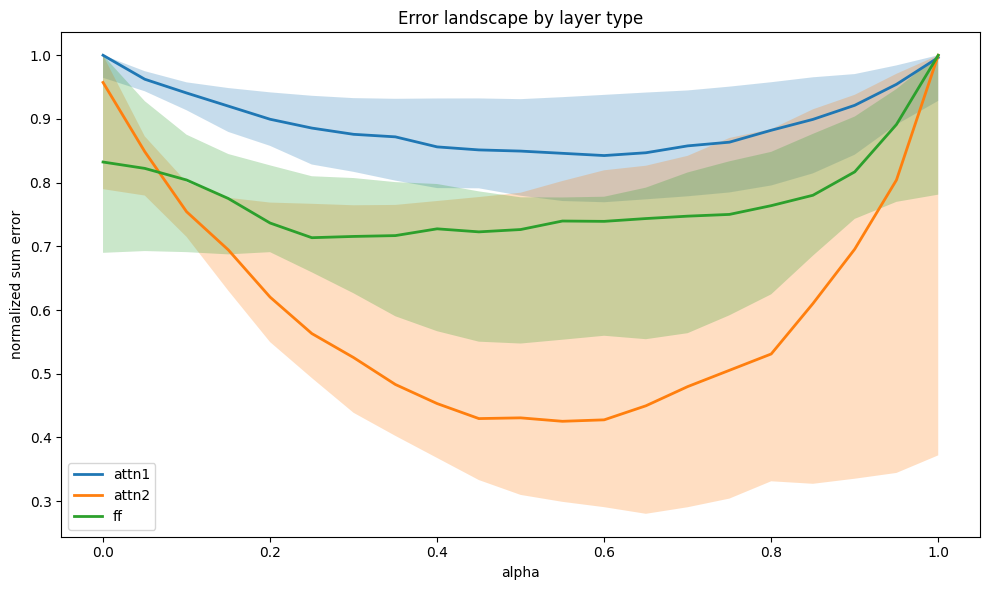

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

colors = {
    "attn1" : "C0",
    "attn2" : "C1",
    "ff" : "C2",
    "other" : "C3",
}

for t, layers in groups.items():
    if not layers:
        continue

    E = np.stack([
        np.array(d["sum_error"][:K]) / max(d["sum_error"][:K])
        for d in layers
    ], axis=0)

    q25 = np.quantile(E, 0.25, axis=0)
    q50 = np.quantile(E, 0.50, axis=0)
    q75 = np.quantile(E, 0.75, axis=0)

    plt.fill_between(alphas, q25, q75, alpha=0.25)
    plt.plot(alphas, q50, linewidth=2, label=t)

plt.xlabel("alpha")
plt.ylabel("normalized sum error")
plt.title("Error landscape by layer type")
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
import os

mine = "/home/work/workspace/dhkim2810/qtbench/examples/diffusion/final/diffusion/sdxl/sdxl/w.4-x.4-y.32/w.sfp4_e2m1_all-x.sfp4_e2m1_all-y.fp32/w.v16.sfp8_e4m3_nan.tsnr.fp32-x.v16.sfp8_e4m3_nan-y.tnsr.fp32/w.static/shift-skip.x.[[w]].w.[aa+e+fa+rs+rtp+s+tan+tn+tpi+tpo]-qdiff.128-t50.g5-s5000.RUNNING/run-260128.182007.RUNNING/samples/COCO"
base = "/home/work/workspace/dhkim2810/qtbench/examples/diffusion/baselines/torch.float32/sdxl/euler50-g5/samples/COCO"

my_imgs = os.listdir(mine+"/COCO_val-5000")
base_imgs = os.listdir(base+"/COCO_val-5000")

# Find intersetting images
inter_imgs = set(my_imgs).intersection(set(base_imgs))

In [9]:
len(inter_imgs)

3776

In [10]:
# Move intersetting images to a separate folder for FID computation under COCO_val-3776
import tqdm.auto as tqdm
import shutil
os.makedirs(mine+"/COCO_val-3776", exist_ok=True)
os.makedirs(base+"/COCO_val-3776", exist_ok=True)

for img in tqdm.tqdm(inter_imgs):
    shutil.move(os.path.join(mine, "COCO_val-5000", img), os.path.join(mine, "COCO_val-3776", img))
    shutil.move(os.path.join(base, "COCO_val-5000", img), os.path.join(base, "COCO_val-3776", img))

/home/work/.cache/pypoetry/virtualenvs/qtbench-rq0DrYIM-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 3776/3776 [00:14<00:00, 259.99it/s]
